# A Demo notebook for running ARC

In [1]:
import rmgpy
from rmgpy.molecule.molecule import *
from rmgpy.species import Species
from arc.species import ARCSpecies
from IPython.display import display
import arc
import matplotlib.pyplot as plt
%matplotlib notebook

Using Theano backend.


### Below are different methods to define species in ARC

In [2]:
# Method 1: RMG Species object (here by SMILES)
spc1 = Species(molecule=[Molecule().fromSMILES("C=C[O]")])  # delocalized radical + amine
spc1.label = 'vinoxy'
print '1.', spc1.label + ':'
display(spc1)

# Method 2: ARCSpecies object by XYZ (also give SMILES for thermo BAC)
oh_xyz = """O       0.00000000    0.00000000   -0.12002167
H       0.00000000    0.00000000    0.85098324"""
spc2 = ARCSpecies(label='OH', xyz=oh_xyz, smiles='[OH]', multiplicity=2, charge=0)
print '\n\n', '2.', spc2.label + ':'
display(spc2.mol)

# Method 3: ARCSpecies object by SMILES
spc3 = ARCSpecies(label='methylamine', smiles='CN', multiplicity=1, charge=0)
print '\n\n', '3.', spc3.label + ':'
display(spc3.mol)

# Method 4: ARCSpecies object by RMG Molecule object
mol4 = Molecule().fromSMILES("C=CC")
spc4 = ARCSpecies(label='propene', mol=mol4, multiplicity=1, charge=0)
print '\n\n', '4.', spc4.label + ':'
display(spc4.mol)

# Method 5: ARCSpecies by AdjacencyList (to generate AdjLists, see https://rmg.mit.edu/molecule_search)
so2_adj = """1 N u0 p1 c0 {2,S} {3,S} {4,S}
2 N u0 p1 c0 {1,S} {5,S} {6,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 H u0 p0 c0 {2,S}
6 H u0 p0 c0 {2,S}"""
spc5 = ARCSpecies(label='N2H4', adjlist=so2_adj, multiplicity=1, charge=0)
print '\n\n', '5.', spc5.label + ':'
display(spc5.mol)

# Last, collect all RMG Species objects and ARCSpecies objects in different lists:
rmg_species_list = [spc1]
arc_species_list = [spc2, spc3, spc4, spc5]

1. vinoxy:




2. OH:




3. methylamine:




4. propene:




5. N2H4:


### Running ARC:

ARC execution initiated on Sat Dec 22 22:55:47 2018

###############################################################
#                                                             #
#                            ARC                              #
#                                                             #
#   Version: 0.1                                              #
#                                                             #
###############################################################

Starting project ArcDemo


Executing QM jobs remotely. Mapping servers...
Using Gaussian on pharos
Using QChem on pharos
Using Molpro on pharos


Using default level b97-d3/6-311+g(d,p) for refined conformer searches (after filtering via force fields)
Using default level wb97x-d3/6-311+g(d,p) for geometry optimizations
Using default level wb97x-d3/6-311+g(d,p) for frequency calculations
Using default level ccsd(t)-f12/cc-pvtz-f12 for single point calculations
Using ccsd(t)-f12/cc-pvtz-f12 as m

You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a3250 for methylamine
Running job sp_a3251 for methylamine
Running job scan_a3252 for methylamine (pivots: [1, 2])
  Ending job opt_a3248 for propene (0:00:46)

Optimized geometry for propene at wb97x-d3/6-311+g(d,p):
C       1.23170564   -0.16218598    0.00000000
C      -0.13405710    0.45370520    0.00000000
C      -1.27807440   -0.22043617    0.00000000
H       1.17955409   -1.25356606    0.00000000
H       1.80159154    0.15357219    0.87974678
H       1.80159154    0.15357219   -0.87974678
H      -0.16698477    1.54264820    0.00000000
H      -2.23794868    0.28445400    0.00000000
H      -1.29494056   -1.30719590    0.00000000



You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a3253 for propene
Running job sp_a3254 for propene
Running job scan_a3255 for propene (pivots: [1, 2])
  Ending job opt_a3249 for N2H4 (0:00:55)

Optimized geometry for N2H4 at wb97x-d3/6-311+g(d,p):
N       0.71516941   -0.15344840    0.00000000
N      -0.71516941    0.15344840    0.00000000
H       1.09160185    0.35232696   -0.79718231
H       1.09160185    0.35232696    0.79718231
H      -1.09160185   -0.35232696   -0.79718231
H      -1.09160185   -0.35232696    0.79718231



You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a3256 for N2H4
Running job sp_a3257 for N2H4
Running job scan_a3258 for N2H4 (pivots: [1, 2])
  Ending job conformer_a3237 for vinoxy (0:03:20)
  Ending job freq_a3246 for OH (0:01:48)

All jobs for species OH successfully converged. Elapsed time: 00:04:16
  Ending job sp_a3254 for propene (0:00:42)


Error: Job sp_a3254 has server status done on pharos. Troubleshooting by changing node.
Running job sp_a3254 for propene
  Ending job conformer_a3238 for vinoxy (0:03:41)
  Ending job conformer_a3239 for vinoxy (0:03:45)

Conformer jobs for vinoxy successfully terminated.

Running job opt_a3259 for vinoxy
  Ending job sp_a3257 for N2H4 (0:00:58)
  Ending job freq_a3250 for methylamine (0:02:23)
  Ending job freq_a3256 for N2H4 (0:01:51)
Error: species N2H4 has 1 imaginary frequencies, should have exactly 0.
Species N2H4 has a negative frequencies (-151.8). Perturbing its geometry using the respective vibrational displacements
Deleting all currently running jobs for specie

You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a3264 for vinoxy
Running job sp_a3265 for vinoxy
Running job scan_a3266 for vinoxy (pivots: [2, 3])
  Ending job opt_a3263 for N2H4 (0:01:04)
Running job opt_a3267 for N2H4 (fine opt)
  Ending job freq_a3253 for propene (0:04:45)
  Ending job opt_a3267 for N2H4 (0:00:50)

Optimized geometry for N2H4 at wb97x-d3/6-311+g(d,p):
N       0.70312415   -0.09636562   -0.07151248
N      -0.70312415    0.09636562   -0.07151248
H       1.14647873    0.77336051   -0.33373553
H       1.06215827   -0.38713244    0.83140422
H      -1.14647873   -0.77336051   -0.33373553
H      -1.06215827    0.38713244    0.83140422



You appear to be running in JupyterLab. You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Running job freq_a3268 for N2H4
Running job sp_a3269 for N2H4
Running job scan_a3270 for N2H4 (pivots: [1, 2])
  Ending job freq_a3264 for vinoxy (0:02:46)
  Ending job freq_a3268 for N2H4 (0:01:39)
  Ending job sp_a3269 for N2H4 (0:01:43)
  Ending job sp_a3265 for vinoxy (0:08:21)
  Ending job scan_a3252 for methylamine (0:51:52)
Rotor scan between pivots [1, 2] for methylamine is:


<IPython.core.display.Javascript object>


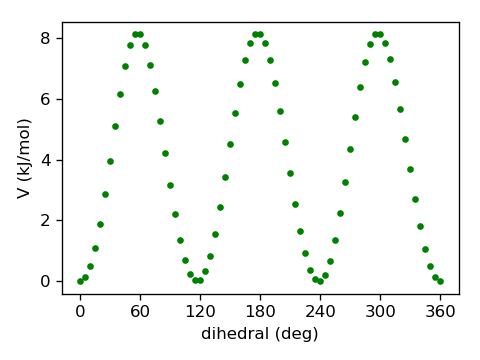


All jobs for species methylamine successfully converged. Elapsed time: 00:55:14
  Ending job scan_a3270 for N2H4 (0:50:59)
Rotor scan between pivots [1, 2] for N2H4 is:


<IPython.core.display.Javascript object>


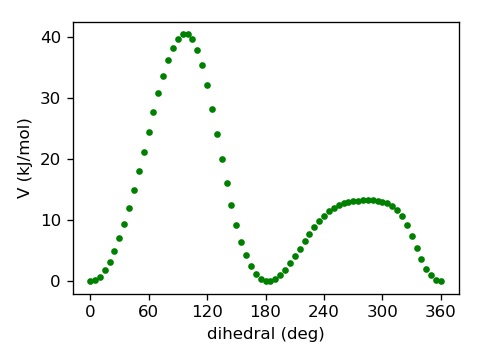


All jobs for species N2H4 successfully converged. Elapsed time: 00:59:14
Currently running jobs:
{'propene': ['scan_a3255'], 'vinoxy': ['scan_a3266']}
  Ending job scan_a3255 for propene (1:00:07)
Rotor scan between pivots [1, 2] for propene is:


<IPython.core.display.Javascript object>


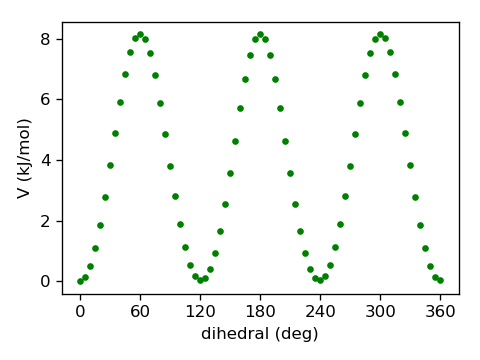

  Ending job scan_a3266 for vinoxy (1:01:58)
Rotor scan between pivots [2, 3] for vinoxy is:


<IPython.core.display.Javascript object>


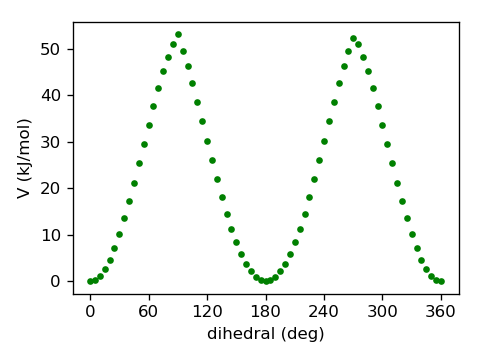


All jobs for species vinoxy successfully converged. Elapsed time: 01:08:13
Symmetry input file written to /home/alongd/Code/ARC/scratch/0.symm
Point group: Cs
Loading species methylamine...
Assigned a frequency scale factor of 0.984 for model chemistry ccsd(t)-f12/cc-pvtz-f12
Loading statistical mechanics parameters for methylamine...
Saving statistical mechanics parameters for methylamine...
Generating NASA thermo model for methylamine...
Saving thermo for methylamine...



Thermodynamics for methylamine:
  Enthalpy of formation (298 K)   =    -3.811 kcal/mol
  Entropy of formation (298 K)    =    60.067 cal/(mol*K)
   =========== =========== =========== =========== ===========
   Temperature Heat cap.   Enthalpy    Entropy     Free energy
   (K)         (cal/mol*K) (kcal/mol)  (cal/mol*K) (kcal/mol)
   =========== =========== =========== =========== ===========
           300      11.921      -3.788      60.146     -21.831
           400      14.109      -2.487      63.873     -28.0

In [3]:
# Just pass the species lists along with a project name to ARC.
# Optional paramters: level_of_theory, conformer_level, composite_method, opt_level, freq_level, sp_level, scan_level,
#                     fine=True, generate_conformers=True, scan_rotors=True, use_bac=True, model_chemistry
arc0 = arc.ARC(project='ArcDemo', rmg_species_list=rmg_species_list, arc_species_list=arc_species_list)
arc0.execute()